In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv', delimiter=';')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [4]:
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [5]:
print(df.describe())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


# DATA VISUALISATION

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
#warnings.filterwarnings('ignore')

C:\Users\Damini\AppData\Local\Temp\ipykernel_19780\2626602301.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap=colormap,fmt='.1f')


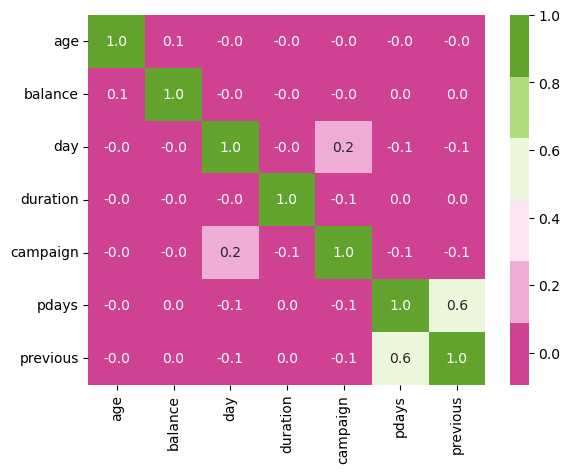

In [7]:
colormap = sns.color_palette("PiYG")
sns.heatmap(df.corr(),annot=True,cmap=colormap,fmt='.1f')
plt.show()

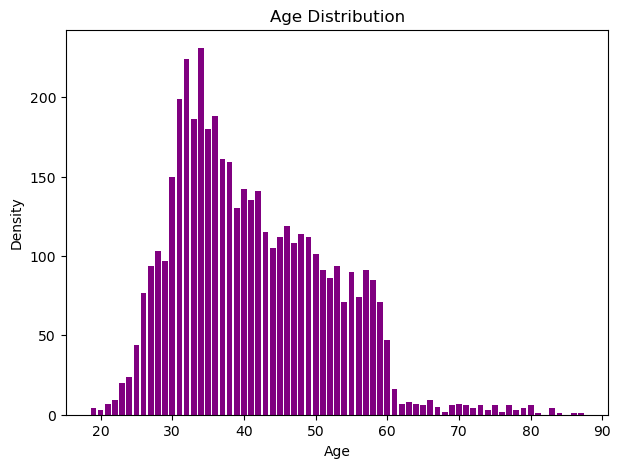

In [8]:
age=df['age'].value_counts().reset_index()
plt.figure(figsize=(7,5))
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Density")
plt.bar(age['index'],age['age'],color='purple')
plt.show()

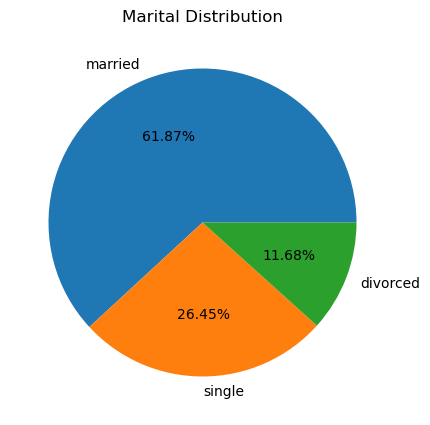

In [9]:
marital=df['marital'].value_counts().reset_index()
plt.figure(figsize=(7,5))
plt.title('Marital Distribution')
plt.pie(marital['marital'],labels=marital['index'],autopct='%1.2f%%')
plt.show()

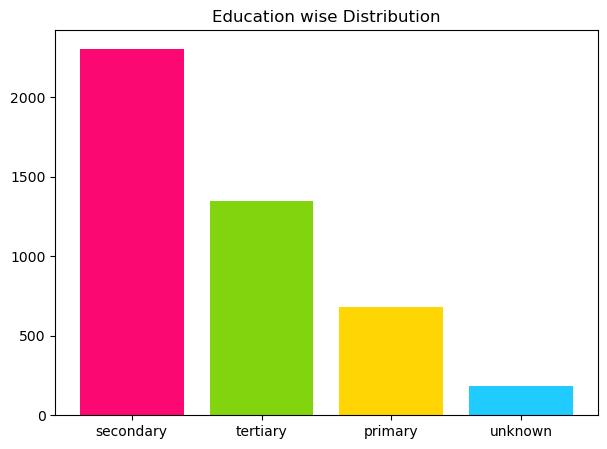

In [10]:
educ=df['education'].value_counts().reset_index()
plt.figure(figsize=(7,5))
color=['#fc0872','#82d40f','#ffd503','#1fcbff']
plt.title('Education wise Distribution')
plt.bar(educ['index'],educ['education'],color=color)
plt.show()

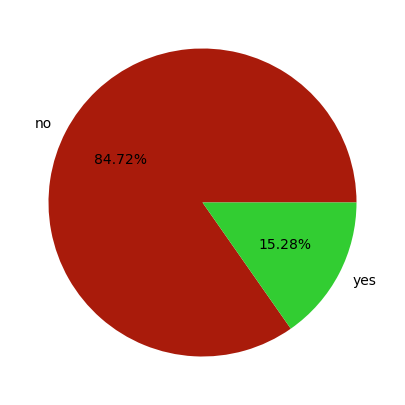

In [11]:
loan=df['loan'].value_counts().reset_index()
plt.figure(figsize=(7,5))
color=['#A91B0B','#32CD32']
plt.pie(loan['loan'],labels=loan['index'],autopct='%1.2f%%',colors=color)
plt.show()

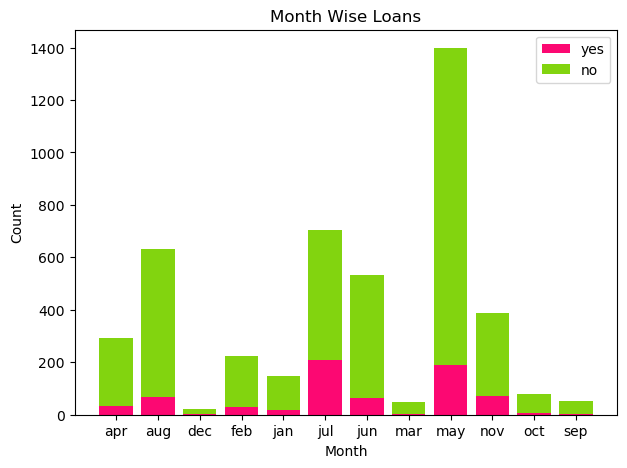

In [12]:
mon_loan=df.groupby(['month','loan']).size().reset_index()
mon_loan.rename(columns={0:'Count'},inplace=True)
mon_loan_yes=mon_loan[mon_loan['loan']=='yes']
mon_loan_no=mon_loan[mon_loan['loan']=='no']
plt.figure(figsize=(7,5))
plt.title('Month Wise Loans')
plt.xlabel('Month')
plt.ylabel('Count')
plt.bar(mon_loan_yes['month'],mon_loan_yes['Count'],label='yes',color='#fc0872')
plt.bar(mon_loan_no['month'],mon_loan_no['Count'],bottom=mon_loan_yes['Count'],label='no',color='#82d40f')
plt.legend()
plt.show()

# DATA PREPROCESSING AND MODEL BUILDING

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88
